In [1]:
import torch
from torch import nn as nn
import pandas as pd
import torch.nn.functional as F
from torch import optim
from torch.utils.data import DataLoader, Dataset, random_split, TensorDataset
from tqdm import tqdm
import numpy as np
#import seaborn as sb
from datetime import datetime
#from sklearn.metrics import classification_report 
from pdb import set_trace

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"


In [3]:
torch.cuda.is_available()

True

In [4]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Using GPU")
else:
    device = torch.device("cpu")
    print("Using CPU")

Using GPU


In [5]:
data = pd.read_csv(f"/001/usuarios/joshuaguerrero/tesis/parts/dictionary_ngrams5_matrix.csv")
len(data)
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,103,104,105,106,107,108,109,110,111,tag_icd
0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,D3
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,D7


In [6]:
count = 0
data["nota_clinica"] = pd.Series()
for index,rows in data.iterrows():
    data["nota_clinica"][count] = rows.values[1:-2]
    count += 1
X = data["nota_clinica"]

/001/usuarios/joshuaguerrero/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/001/usuarios/joshuaguerrero/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/001/usuarios/joshuaguerrero/anaconda3/envs/inaoe/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)

In [7]:
y = data["tag_icd"].fillna(value="NoDerma")
y

0         D3
1    NoDerma
2         D7
Name: tag_icd, dtype: object

In [8]:
tag_to_num = {tag: i for i, tag in enumerate(y)}
tag_to_num

{'D3': 0, 'NoDerma': 1, 'D7': 2}

In [9]:
y_tag_num = y.map(tag_to_num)
y_tag_num

0    0
1    1
2    2
Name: tag_icd, dtype: int64

In [10]:
X_train, x_test = random_split(X, [1,2])

In [11]:
y_train, y_test = random_split(y_tag_num, [1,2])

In [12]:
X_train.dataset

0    [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...
1    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
2    [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
Name: nota_clinica, dtype: object

In [13]:
X_train_tensor = torch.Tensor(X_train.dataset)
x_test_tensor = torch.Tensor(x_test.dataset)
Y_train_tensor = torch.Tensor(y_train.dataset)
y_train_tensor = torch.Tensor(y_test.dataset) 

/001/usuarios/joshuaguerrero/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811748419/work/torch/csrc/utils/tensor_new.cpp:201.)
  """Entry point for launching an IPython kernel.


In [14]:
X_train_tensor

tensor([[1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
         1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
         1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
         1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
         0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
         1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
         0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
  

In [15]:
y_train_tensor

tensor([0., 1., 2.])

In [50]:
class Conv1(nn.Module):
    def __init__(self,input_data):
        super().__init__()
        self.entrada = input_data
        self.conv1 = nn.Conv1d(self.entrada,100,1,1,1)
        self.conv2 = nn.Conv1d(100,100,1,1,1)
        self.droput = nn.Dropout()
        x = torch.randn(self.entrada).view(1,self.entrada,1)
        print(x.shape)
        self._to_linear = None
        self.convs(x)
        self.fc1 = nn.Linear(self._to_linear,16)
        self.fc2 = nn.Linear(16,1)
      
    def convs(self,x):
        x = F.max_pool1d(F.relu(self.conv1(x)),1)
        x = F.max_pool1d(F.relu(self.droput(self.conv2(x))),1)
        print(x.shape)
        x = F.max_pool1d(F.relu(self.droput(self.conv2(x))),3)
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]
            print(x[0].shape)
        return x
    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1,self._to_linear)
        x = F.relu(self.fc1(x))
        x = F.tanh(self.fc2(x))
        return x

In [51]:
net = Conv1(X_train_tensor.shape[1]).to(device)

torch.Size([1, 112, 1])
torch.Size([1, 100, 5])
torch.Size([100, 2])


In [52]:
print(net)

Conv1(
  (conv1): Conv1d(112, 100, kernel_size=(1,), stride=(1,), padding=(1,))
  (conv2): Conv1d(100, 100, kernel_size=(1,), stride=(1,), padding=(1,))
  (droput): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=100, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=1, bias=True)
)


In [61]:
def train(net, epochs, batch_size):
    optimizer = optim.Adam(net.parameters(), lr = 0.001)
    #loss_function = F.binary_cross_entropy()
    loss_ep = []
    for epoch in range(epochs):
        for i in tqdm(range(0,len(X),batch_size)):
            
            batch_x = X_train_tensor[i:i+batch_size]
            batch_y = y_train_tensor[i:i+batch_size]

            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            
            net.zero_grad()
            batch_x = batch_x.view(len(batch_x),batch_x.shape[1],1)
            output = net(batch_x)
            #print(output.shape)
            batch_y = batch_y.view(-1,1)
            
            
            loss = F.cross_entropy(output, batch_y)
            loss.backward()
            optimizer.step()
        
        loss_ep.append(loss)
        print(f"Epoch: {epoch}. LOSS: {loss}")

In [62]:
train(net,100,500)

  0%|          | 0/1 [00:00<?, ?it/s]/001/usuarios/joshuaguerrero/anaconda3/envs/inaoe/lib/python3.6/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([3, 100, 5])


ValueError: Target size (torch.Size([3, 1])) must be the same as input size (torch.Size([6, 1]))

In [45]:
def test(net):
    correct = 0
    total = 0
    pred = []
    real = []
    with torch.no_grad():
        for i in tqdm(range(len(x_test_tensor))):
            print(x_test_tensor)
            real_class = y_test[i].to(device)
            net_out = net(x_test_tensor[i].view(1,61460,1).to(device))
            predicted_class = torch.argmax(net_out)
            #print(predicted_class,real_class)
            real_class = real_class.view([])
            real_class = real_class.int()
            predicted_class = predicted_class.view([])
            predicted_class = predicted_class.int()
            pred.append(predicted_class)
            real.append(real_class)
            if predicted_class == real_class:
                correct += 1
            total += 1
            
    print("Real class: ", real_class)
    print("Predicted class: ", predicted_class)
    print("Tensor de salida", net_out)        
    print("Accuracy: ",round(correct/total,3))
    return pred,real

In [75]:
datos_pred, datos_real = test(net)

NameError: name 'x' is not defined

In [23]:
a = datetime.now()
dt_object = datetime.timestamp(a)
torch.save(net.state_dict(), "models/conv-{}.pth".format(dt_object))

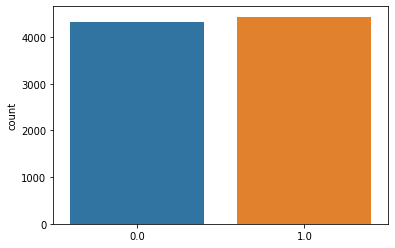

In [24]:
sb.countplot(np.asarray(y_train))

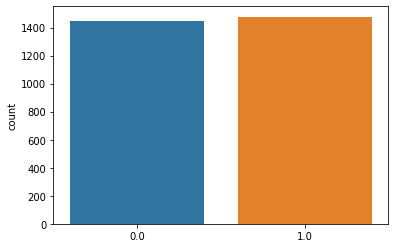

In [25]:
sb.countplot(np.asarray(y_test.view(len(y_test))))

In [26]:
report_y = [(datos_real[i].data) for i in range(len(datos_real))]
report_y = [(report_y[i].cpu()) for i in range(len(datos_real))]
report_y = [(report_y[i].numpy()) for i in range(len(datos_real))]
report_y = [int(report_y[i].item()) for i in range(len(datos_real))]
#report_y = [(int(y_test[i].item())) for i in range(len(y_test))]

In [27]:
report_pred = [(datos_pred[i].data) for i in range(len(datos_pred))]
report_pred = [(report_pred[i].cpu()) for i in range(len(datos_pred))]
report_pred = [(report_pred[i].numpy()) for i in range(len(datos_pred))]
report_pred = [(report_pred[i].item()) for i in range(len(datos_pred))]
report_pred = [int(report_pred[i]) for i in range(len(datos_pred))]

In [28]:
print(classification_report(report_y, report_pred))

D:\Users\joshu\Anaconda3\envs\tesis\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1447
           1       0.00      0.00      0.00      1477

    accuracy                           0.49      2924
   macro avg       0.25      0.50      0.33      2924
weighted avg       0.24      0.49      0.33      2924



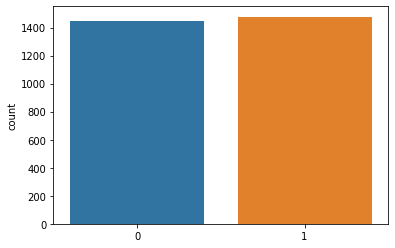

In [29]:
sb.countplot(report_y)

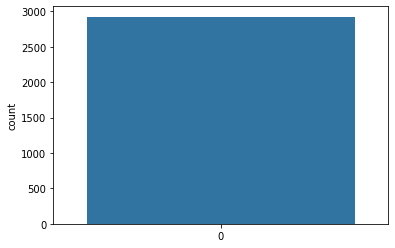

In [30]:
sb.countplot(report_pred)